In [50]:
import re
import string
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from torchtext.data.metrics import bleu_score

In [81]:
!pip install git+https://github.com/Maluuba/nlg-eval.git@master
# if you are a macOS High Sierra or higher, then run this to allow multithreading:
!export OBJC_DISABLE_INITIALIZE_FORK_SAFETY=YES
!nlg-eval --setup

  Cloning https://github.com/Maluuba/nlg-eval.git (to revision master) to /private/var/folders/lw/m0bn1b797ks_9j0997n1dfph0000gn/T/pip-req-build-tmggqpyx
  Running command git clone --filter=blob:none -q https://github.com/Maluuba/nlg-eval.git /private/var/folders/lw/m0bn1b797ks_9j0997n1dfph0000gn/T/pip-req-build-tmggqpyx
  Resolved https://github.com/Maluuba/nlg-eval.git to commit 7f7993035a2f4729a15d20040fd904933ea58767
  Preparing metadata (setup.py) ... done
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed
[nltk_data]     (_ssl.c:847)>
Installing to /Users/haoyuhe/.cache/nlgeval
In case of incomplete downloads, delete the directory and run `nlg-eval --setup /Users/haoyuhe/.cache/nlgeval' again.
glove2word2vec.py: 100%|█████████████████| 1.00/1.00 [00:00<00:00, 263 chunks/s]
dictionary.txt: 550 chunks [00:02, 260 chunks/s]| 0.00/823 [00:00<?, ? chunks/s]
uni_skip.npz: 100%|███████████████████████| 634/634 [05:

2021-12-04 12:37:11,639 : MainThread : INFO : loading vectors from /Users/haoyuhe/.cache/nlgeval/glove.6B.300d.model.bin.vectors.npy with mmap=r
2021-12-04 12:37:11,665 : MainThread : INFO : setting ignored attribute vectors_norm to None
2021-12-04 12:37:11,665 : MainThread : INFO : loaded /Users/haoyuhe/.cache/nlgeval/glove.6B.300d.model.bin


In [ ]:
from nlgeval import NLGEval
nlgeval = NLGEval()  # loads the models

Will try with limiting Meteor to 1GB of memory but this might cause issues.
If you have problems using Meteor, then you can try to lower the `mem` variable in meteor.py


In [51]:
df = pd.read_csv('saved_models/customQA/lstm/2-2_256/test_results.csv')

In [80]:
def df2metrics(df, maxn=2):
    df.dropna(how='any', inplace=True)
    reference = df['original_sentence'].apply(lambda x: [re.sub(r'[^\w\s]', '', x).split()]).values.tolist()
    hypothesis = df['predicted_sentence'].apply(lambda x: re.sub(r'[^\w\s]', '', x).split()).values.tolist()
    weights = [1. / max_n] * max_n
    score_bleu = bleu_score(hypothesis, reference, max_n=max_n, weights=weights)
    metrics_dict = nlgeval.compute_metrics(reference, hypothesis)
    return metrics_dict, score_bleu

0.20015612481683004


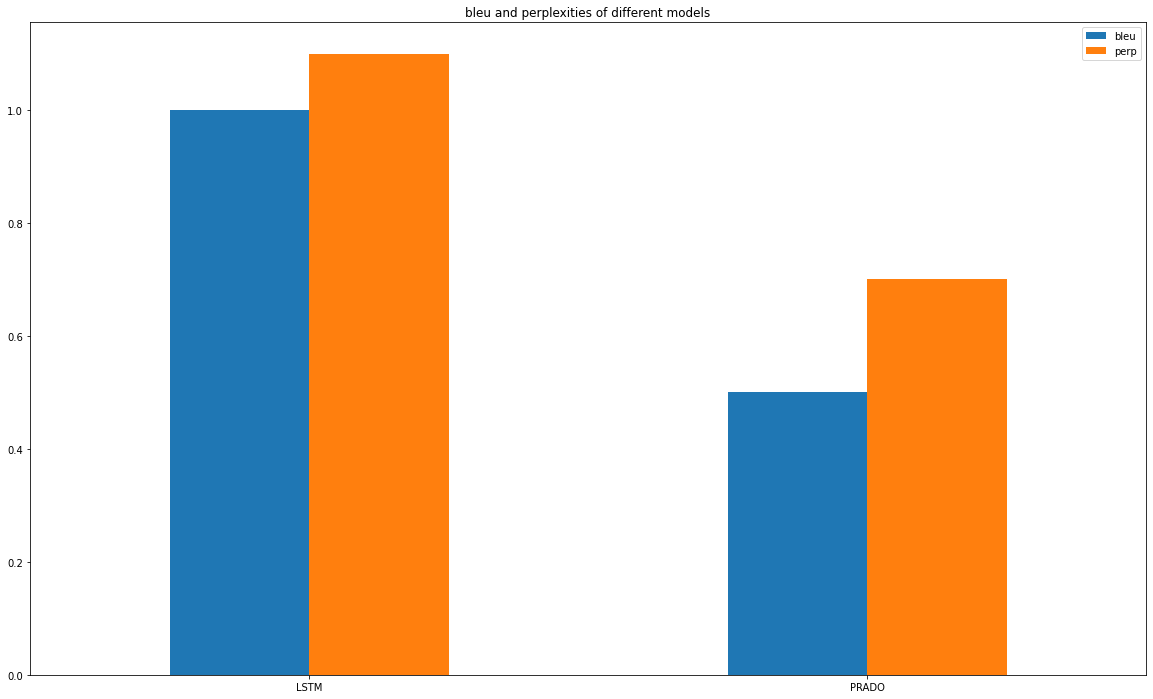

In [39]:
df_results = []
models = ['LSTM', "PRADO"]
for i in range(len(models)):
    metrics_dict, bleu_score = df2metrics(pd.read_csv(f'saved_models/customQA/{models[i]}/2-2_256/test_results.csv'))
    df_results.append((models[i].lower(), bleu_score, metrics_dict[]))
results = pd.DataFrame(df_results, columns=['model', 'bleu', "perp"])

ax = results[['bleu',"perp"]].plot(kind='bar', figsize=(20, 12))
ax.set_xticklabels(results["model"].values)
ax.set_title('evaluation results of different models')
plt.xticks(rotation=0)
plt.show();